<a href="https://colab.research.google.com/github/PhanDinhPhong/BTVN2/blob/main/btvn2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

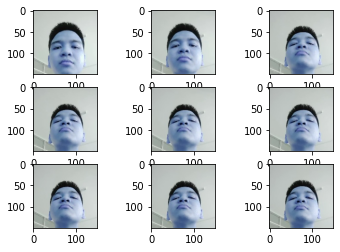

In [16]:
from sklearn.utils import shuffle
from keras.models import Sequential
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
import math as m
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam, RMSprop
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.layers import Dense,Activation,Dropout,Flatten
from tensorflow.keras.utils import to_categorical 
import cv2
import pickle
import sklearn

with open('Nhandienkhuonmat_ANN.pickle', 'rb') as f:
    (x_train, y_train), (x_test,y_test) = pickle.load(f)
x_pre = x_test    #gan test nha chu gán train thì hiển nhiên đúng
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [17]:
x_train =x_train.reshape(x_train.shape[0], -1)
x_train =x_train.astype('float32')
y_train =np_utils.to_categorical(y_train, 2)
x_train, y_train =shuffle(x_train, y_train)
x_train/= 255
y_train.shape

(90, 2)

In [18]:
model = Sequential()

model.add(Dense(128, activation='relu', input_shape = (67500,)))  #150x150x3
model.add(Dense(64, activation ='relu'))
model.add(Dense(64, activation ='relu'))
model.add(Dense(16, activation ='relu'))
model.add(Dense(2, activation ='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = Adam(), metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size = 128, epochs = 30, validation_split = 0.2)

Epoch 1/30
1/1 [==============================] - 1s 606ms/step - loss: 0.7664 - accuracy: 0.3889 - val_loss: 1.0661 - val_accuracy: 0.8889
Epoch 2/30
1/1 [==============================] - 0s 42ms/step - loss: 3.7384 - accuracy: 0.6111 - val_loss: 4.8584 - val_accuracy: 0.8889
Epoch 3/30
1/1 [==============================] - 0s 43ms/step - loss: 6.2323 - accuracy: 0.6111 - val_loss: 0.6100 - val_accuracy: 0.6667
Epoch 4/30
1/1 [==============================] - 0s 40ms/step - loss: 0.6547 - accuracy: 0.6806 - val_loss: 0.5132 - val_accuracy: 0.8889
Epoch 5/30
1/1 [==============================] - 0s 40ms/step - loss: 1.7443 - accuracy: 0.6111 - val_loss: 2.8977 - val_accuracy: 0.1111
Epoch 6/30
1/1 [==============================] - 0s 36ms/step - loss: 2.1369 - accuracy: 0.3889 - val_loss: 0.1903 - val_accuracy: 1.0000
Epoch 7/30
1/1 [==============================] - 0s 41ms/step - loss: 0.2730 - accuracy: 1.0000 - val_loss: 0.1654 - val_accuracy: 0.8889
Epoch 8/30
1/1 [==========

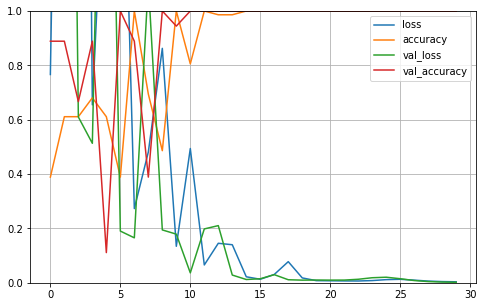

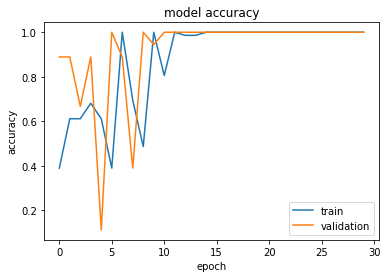

In [19]:
pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.show()

(150, 150, 3)
[1]


'Dự đoán không phải Phong'

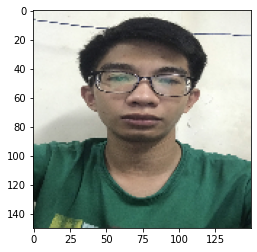

In [20]:
test = 92
plt.imshow(cv2.cvtColor(x_pre[test],cv2.COLOR_BGR2RGB))
print(x_pre[test].shape)
img = x_pre[test].reshape(1,-1)
img = img.astype('float32')
img /= 255
pred = np.argmax(model.predict(img), axis = 1)
print(pred)
Label = ['Dự đoán là Phong','Dự đoán không phải Phong' ]
Label[pred[0]]

(150, 150, 3)
[0]


'Đây là Phong'

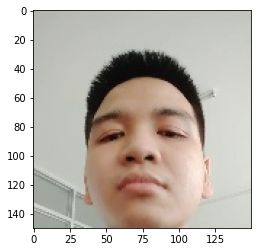

In [21]:
test = 21
plt.imshow(cv2.cvtColor(x_pre[test],cv2.COLOR_BGR2RGB))
print(x_pre[test].shape)
img = x_pre[test].reshape(1,-1)
img = img.astype('float32')
img /= 255
pred = np.argmax(model.predict(img), axis = 1)
print(pred)
Label = ['Đây là Phong','Đây không phải Phong' ]
Label[pred[0]]